# Chapter 8: Transformations
 
This Jupyter notebook is the Python equivalent of the R code in section 8.8 R, pp. 373 - 375, [Introduction to Probability, 1st Edition](https://www.crcpress.com/Introduction-to-Probability/Blitzstein-Hwang/p/book/9781466575578), Blitzstein & Hwang.

----

In [1]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

## Beta and Gamma distributions

In [2]:
from scipy.stats import beta, gamma

# to learn more about scipy.stats.beta, un-comment ouf the following line
#print(beta.__doc__)

# to learn more about scipy.stats.gamma, un-comment ouf the following line
#rint(gamma.__doc__)

The Beta and Gamma distributions are implemented in [`scipy.stats.beta`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.beta.html) and [`scipy.stats.gamma`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.gamma.html), respectively.

* To evaluate the $Beta(a, b)$ PDF or CDF at $x$, we use `beta.pdf(x, a, b)` and `beta.cdf(x, a, b)`. To generate n realizations from the $Beta(a, b)$ distribution, we use `beta.rvs(a, b, size=n)`. 
* To evaluate the $Gamma(a, \lambda)$ PDF or CDF at $x$, we use`gamma.pdf(x, a, scale=1/lambd)` or `gamma.cdf(x, a, scale=1/lambd)`. To generate $n$ realizations from the $Gamma(a, \lambda)$ distribution, we use `gamma.rvs(a, scale=1/lambd, size=n)`. 
   * The $\lambda$ parameter in $Gamma(a, \lambda)$ corresponds in `gamma` to using `scale` = $\frac{1}{\lambda}$ and default value of `loc` = 0.

For example, we can check that the $Gamma(3, 2)$ distribution has mean $\frac{3}{2}$ and variance $\frac{3}{4}$. To do this, we generate a large number of $Gamma(3, 2)$ random variables using `gamma.rvs`, then compute their mean and var using their corresponding methods in `numpy.array` (you could of course also use `numpy.mean` and `numpy.var`, passing in the array of r.v.):

In [3]:
# seed the random number generator
np.random.seed(317811)

alpha = 3.0
lambd = 2.0

y = gamma.rvs(alpha, scale=1/lambd, size=10**5)

mean = y.mean()
#mean = np.mean(y)
print('mean of Gamma(3, 2) = {}'.format(mean))

var = y.var()
#var = np.var(y)
print('variance of Gamma(3, 2) = {}'.format(var))

mean of Gamma(3, 2) = 1.5012880719327166
variance of Gamma(3, 2) = 0.7512319256875035


**NOTE**: [`lambda`](https://docs.python.org/3/tutorial/controlflow.html#lambda-expressions) in Python is a reserved keyword for declaring small, anonymous functions, and so we cannot used the name `lambda` for variable or functions.

Try changing the `numpy.random.seed` input value in the code block above, and hit SHIFT+ENTER to re-execute the code block. Did you get values that are close to 1.5 and 0.75, respectively?

## Convolution of Uniforms

Using [`scipy.stats.uniform`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.uniform.html) and [`matplotlib.pyplot.hist`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html), we can quickly verify that for $X, Y \stackrel{i.i.d.}{\sim} Unif(0, 1)$, the distribution of $T = X + Y$ is triangular in shape:

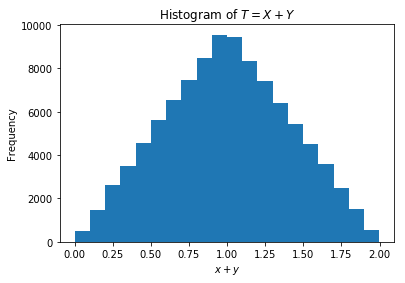

In [4]:
np.random.seed(514229)

from scipy.stats import uniform

x = uniform.rvs(size=10**5)
y = uniform.rvs(size=10**5)

t = x + y

plt.hist(t, bins=20)

plt.title(r'Histogram of $T = X + Y$')
plt.xlabel(r'$x + y$')
plt.ylabel('Frequency')

plt.show()

The histogram looks like an ascending and then descending staircase, a discrete approximation to a triangle.

## Bayes' billiards

In the Bayes' billiards story, we have $n$ white balls and 1 gray ball, throw them onto the unit interval completely at random, and count the number of white balls to the left of the gray ball. Letting $p$ be the position of the gray ball and $X$ be the number of white balls to the left of the gray ball, we have

\begin{align}
  p &\sim Unif(0, 1) \\
  X|p &\sim Bin(n, p)
\end{align}

By performing this experiment a large number of times, we can verify the results we derived in this chapter about the marginal PMF of $X$ and the posterior PDF of $p \text{ given } X = x$. We'll let the number of simulations be called `nsims`, to avoid a name conflict with the number of white balls, `n`, which we set equal to 10:

In [5]:
nsims = 10**5
n = 10

We simulate 10<sup>5</sup> values of $p$, then simulate 10<sup>5</sup> values from the conditional distribution of $X$ given $p$:

In [6]:
np.random.seed(832040)

p = uniform.rvs(size=nsims)

from scipy.stats import binom

x = binom.rvs(n, p, size=nsims)

Notice that we feed the entire array `p` into `binom.rvs`. This means that the first element of `x` is generated using the first element of `p`, the second element of `x` is generated using the second element of `p`, and so forth. Thus, conditional on a particular element of `p`, the corresponding element of `x` is Binomial, but the elements of `p` are themselves Uniform, exactly as the model specifies.

According to the Bayes' billiards argument, the marginal distribution of $X$ should be Discrete Uniform on the integers 0 through $n$. Is this in fact the case? We can make a histogram of `x` to check! Because the distribution of $X$ is discrete, we can specify `bins=np.arange(0, n+1, 0.5), align='left'` in the call to `matplotlib.pyplot.hist` so that each bar is centered at an integer value:

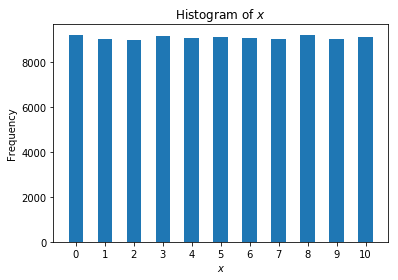

In [7]:
plt.hist(x, bins=np.arange(0, n+1, 0.5), align='left')

plt.title(r'Histogram of $x$')
plt.xlabel(r'$x$')
plt.ylabel('Frequency')
# also set the x-axis ticks to show integers 0, 1, 2, ..., 10
plt.xticks(range(0, 10+1))

plt.show()

Indeed, all the histogram bars are approximately equal in height, consistent with a Discrete Uniform distribution. 

Now for the posterior distribution of $p$ given $X = x$. Conditioning is very simple since we are using `numpy.array`. To consider only the simulated values of $p$ where the value of $X$ was 3, we use [`numpy.where(x==3)`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.where.html) to find the indices where `x` = 3, and then use that within the square brackets of `p` to index only those corresponding values. In particular, we can create a histogram of these values using `matplotlib.pyplot.hist` to see what the posterior distribution of $p$ given $X = 3$ looks like.

According to the Beta-Binomial conjugacy result, the true posterior distribution is $p|X = 3 \sim Beta(4, 8)$. We can plot the histogram of `p[numpy.where(x==3)]` next to a histogram of simulated values from the $Beta(4, 8)$ distribution to confirm that they look similar:

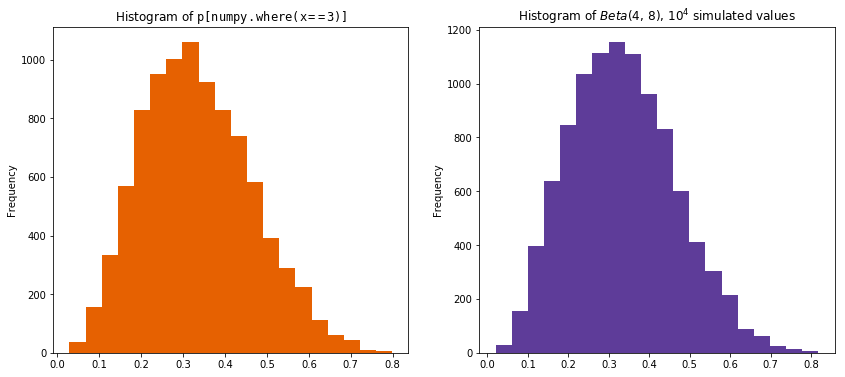

In [8]:
np.random.seed(1346269)

fig = plt.figure(figsize=(14, 6))

p_given_x_3 = p[np.where(x==3)]

ax1 = fig.add_subplot(121)
ax1.hist(p_given_x_3, bins=20, color='#e66101')
ax1.set_title(r'Histogram of $\tt{p[numpy.where(x==3)]}$')
ax1.set_ylabel('Frequency')

brv = beta.rvs(4.0, 8.0, size=10**4)

ax2 = fig.add_subplot(122)
ax2.hist(brv, bins=20, color='#5e3c99')
ax2.set_title(r'Histogram of $Beta(4, \, 8)$, $10^4$ simulated values')
ax2.set_ylabel('Frequency')

plt.show()

For the side-by-side graph above, we obtain an instance of [`matplotlib.pyplot.figure`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.figure.html) from `pyplot`, specifying the figure's width and height. Next, we use [`figure.add_subplot(121)`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplot.html) to create graph axes in a figure with 1 row and 2 columns, in the 1st column position from the left, for the histogram of `p[numpy.where(x==3)]`. Likewise, `figure.add_subplot(122)` creates the graph axes for the histogram for $Beta(4, 8)$ in the 2nd column position of the 1-row, 2-column figure.

## Simulating order statistics

Simulating order statistics in Python/NumPy/SciPy is easy: we simply simulate i.i.d. r.v.s and sort them in order. For example,

In [9]:
np.random.seed(2178309)

from scipy.stats import norm

rv = np.sort(norm.rvs(size=10))
print(rv)

[-2.05800632 -1.14300612 -0.09108752 -0.08188422  0.45810851  0.55556877
  0.59398037  0.9312065   0.98367818  1.12202827]


produces one realization of $X_{(1)}, \ldots, X_{(10)}$, where $X_{(1)}, \ldots, X_{(10)}$ are i.i.d. $N(0, 1)$. If we want to plot a histogram of realizations of, say, $X_{(9)}$, we'll need to use iteration. Let's try using [Python's list comprehensions](https://docs.python.org/3/tutorial/datastructures.html#list-comprehensions):

In [10]:
np.random.seed(3524578)

rv_arr = [np.sort(norm.rvs(size=10)) for _ in range(10**4)]
order_stats = np.array(rv_arr)

print('order_stats has shape: {}'.format(order_stats.shape))

order_stats has shape: (10000, 10)


The 10<sup>4</sup> iterations are done with

    rv_arr = [np.sort(norm.rvs(size=10)) for _ in range(10**4)]

This Python list comprehension does the following:
* loops 10<sup>4</sup> times with `for _ in range(10**4)`, where we ignore the iteration counter by using `_`
   * as we loop, we do not need to know which particular iteration we are on
* for each iteration, calculate `np.sort(norm.rvs(size=10))`
* gather up the results of all the iterations into a Python list (array), assigning this resulting list to `rv_arr`
* this one-liner list comprehension is equivalent to all this code:
<pre>
    rv_arr = []
    for _ in range(10**4):
        rv = np.sort(norm.rvs(size=10))
        rv_arr.append(rv)
</pre>

This creates a matrix, `order_stats`, with 10<sup>4</sup> rows and 10 columns. The _i_<sup>th</sup> column of the matrix contains 10<sup>4</sup> realizations of $X_{(i+1)}$ (don't forget that Python is zero-indexed, so the 8<sup>th</sup> column is $X_{(9)}$!). Now we can create a histogram of $X_{(9)}$, simply by selecting column 8 of the matrix:

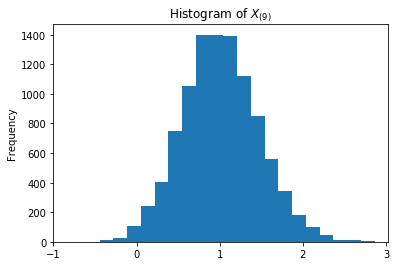

In [11]:
x9 = order_stats[:, 8]

plt.hist(x9, bins=20)

plt.xticks(np.arange(-1, 4, 1))
plt.title(r'Histogram of $X_{(9)}$')
plt.ylabel('Frequency')

plt.show()

We can also compute summaries like `numpy.mean(x9)` and `numpy.var(x9)`.

In [12]:
mean_x9 = np.mean(x9)
print('mean of x9 = {}'.format(mean_x9))

var_x9 = np.var(x9)
print('variance of x9 = {}'.format(var_x9))

mean of x9 = 1.0092010380841254
variance of x9 = 0.2108867888683199


----

&copy; Blitzstein, Joseph K.; Hwang, Jessica. Introduction to Probability (Chapman & Hall/CRC Texts in Statistical Science).